<a href="https://colab.research.google.com/github/VascoBartolo/SP_project/blob/celle/signal_processing_Celle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()
gc = gspread.authorize(creds)

Mounted at /content/drive


In [87]:
import scipy
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import wavfile
import scipy.io
import os
from scipy import fft
from IPython.display import Audio
from scipy import signal
import librosa, librosa.display

In [45]:
fem = '/content/drive/MyDrive/signal processing/females/'
mal =  '/content/drive/MyDrive/signal processing/males/'


fems = np.array([fem+x for x in os.listdir(fem)])
mals = np.array([mal+x for x in os.listdir(mal)])

In [46]:
Audio(mals[0])

In [47]:
Audio(fems[0])

In [48]:
faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate, data
maudios = np.array([wavfile.read(wav_fname)for wav_fname in mals]) # samplerate, data

<ipython-input-48-eb01c03b41d9>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  faudios = np.array([wavfile.read(wav_fname)for wav_fname in fems]) # samplerate, data
<ipython-input-48-eb01c03b41d9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  maudios = np.array([wavfile.read(wav_fname)for wav_fname in mals]) # samplerate, data


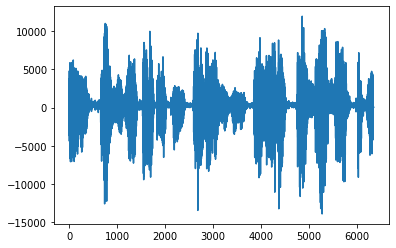

In [49]:
sns.lineplot(data = faudios[0][1][0::10])

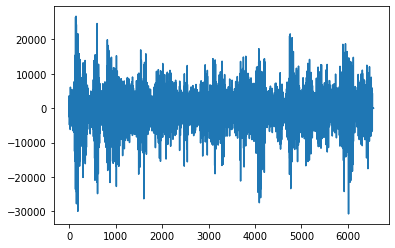

In [50]:
sns.lineplot(data = maudios[0][1][0::10])

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


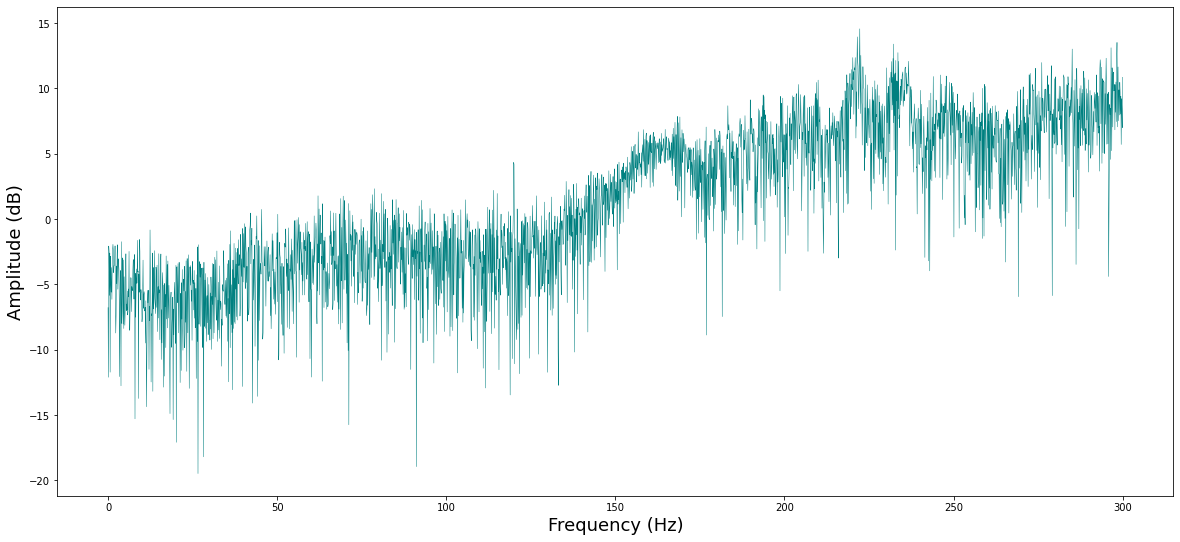

In [42]:
i = 8

data = faudios[i][1]
rate = faudios[0][0]
fourier = fft.fft(data)

n = len(data)
fourier = fourier[0:int((n/2))]
# scale by the number of points so that the magnitude does not depend on the length
fourier = fourier / float(n)
#calculate the frequency at each point in Hz
freqArray = np.arange(0, (n/2), 1.0) * (rate*1.0/n);
x = freqArray[freqArray<300] #human voice range
y = 10*np.log10(fourier)[0:len(x)]
plt.figure(1,figsize=(20,9))
plt.plot(x, y, color='teal', linewidth=0.5)
plt.xlabel('Frequency (Hz)', fontsize=18)
plt.ylabel('Amplitude (dB)', fontsize=18)
plt.show()


In [82]:
order = 10
fs = faudios[0][0]
h_cut = 3500
l_cut= 200

fems_filt = []
mals_filt = []

sys = signal.butter(order, btype = 'bandpass', Wn= [l_cut, h_cut], fs = fs, output = 'sos')

for i in range(0, len(faudios)):
  fems_filt.append(signal.sosfilt(sys, faudios[i][1]))

for i in range(0, len(faudios)):
  mals_filt.append(signal.sosfilt(sys, maudios[i][1]))

In [110]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples
fs = faudios[0][0]


hop_length_duration = float(hop_length)/fs
n_fft_duration = float(n_fft)/fs

fems_libr = []

for i in range(0, faudios.shape[0]):
  stft = librosa.stft(faudios[i][1].astype(float), n_fft=n_fft, hop_length=hop_length) 
  stft = np.abs(stft)
  fems_libr.append(stft)

fems_filt_libr = []

for i in range(0, faudios.shape[0]):
  stft = librosa.stft(fems_filt[i].astype(float), n_fft=n_fft, hop_length=hop_length) 
  stft = np.abs(stft)
  fems_filt_libr.append(stft)

mals_libr = []

for i in range(0, faudios.shape[0]):
  stft = librosa.stft(maudios[i][1].astype(float), n_fft=n_fft, hop_length=hop_length) 
  stft = np.abs(stft)
  mals_libr.append(stft)

mals_filt_libr = []

for i in range(0, faudios.shape[0]):
  stft = librosa.stft(mals_filt[i].astype(float), n_fft=n_fft, hop_length=hop_length) 
  stft = np.abs(stft)
  mals_filt_libr.append(stft)

In [83]:
ffems_fft = []

for i in range(0, faudios.shape[0]):
  fems_fft.append(fft.fft(np.ndarray.tolist(faudios[i][1])))

mals_fft = []

for i in range(0, faudios.shape[0]):
  mals_fft.append(fft.fft(np.ndarray.tolist(maudios[i][1])))

In [84]:
fems_fft_filt = []

for i in range(0, faudios.shape[0]):
  fems_fft_filt.append(fft.fft(np.ndarray.tolist(fems_filt[i])))

mals_fft_filt = []

for i in range(0, faudios.shape[0]):
  mals_fft_filt.append(fft.fft(np.ndarray.tolist(mals_filt[i])))

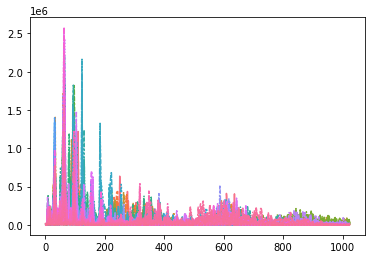

In [120]:
rand = np.random.randint(0, len(fems_fft))
sns.lineplot(data = fems_libr[rand], legend = False)

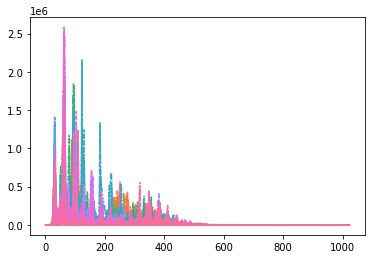

In [121]:
sns.lineplot(data = fems_filt_libr[rand], legend = False)

In [135]:
rand = np.random.randint(0, len(fems_fft))
print(len(fems_filt_libr[rand]))
print(len(fems_fft_filt[rand]))

1025
65536


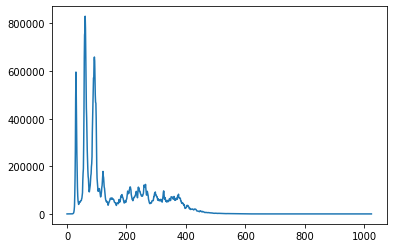

In [141]:
sns.lineplot(data = np.mean(fems_filt_libr[rand], axis = 1), legend = False)

In [148]:
wn = Audio(np.mean(fems_filt_libr[rand], axis = 1), rate=16000, autoplay=True) ## hear thhe last audio
display(wn)

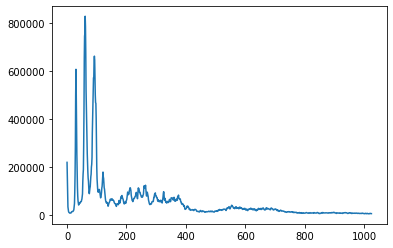

In [143]:
sns.lineplot(data = np.mean(fems_libr[rand], axis = 1), legend = False)

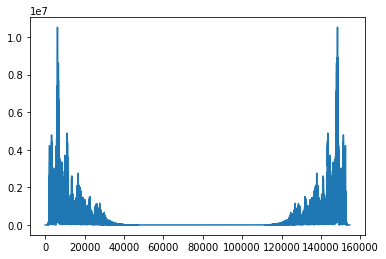

In [86]:
sns.lineplot(data = np.abs(fems_fft_filt[rand]))

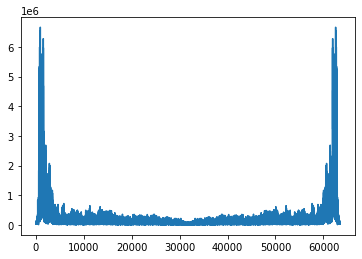

In [ ]:
rand = np.random.randint(0, len(fems_fft))
sns.lineplot(data = np.abs(fems_fft[rand]))

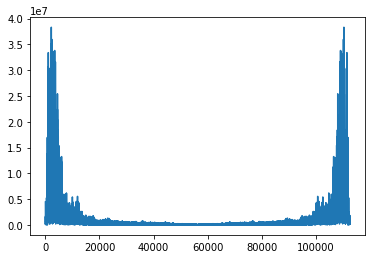

In [ ]:
rand = np.random.randint(0, len(mals_fft))
sns.lineplot(data = np.abs(mals_fft[rand]))

In [ ]:
lower_thresh = 100
higher_thresh = 17000

fems_clean = []

for i in range(0, len(fems_fft)):
  a = []
  for j in range(0, len(fems_fft[i])):
    if (np.abs(fems_fft[i][j]) > lower_thresh) and (np.abs(fems_fft[i][j]) < higher_thresh):
      a.append(np.abs(fems_fft[i][j]))
  fems_clean.append(a)

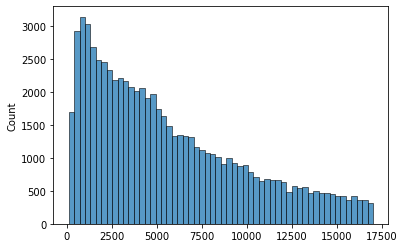

In [ ]:
rand = np.random.randint(0, len(fems_clean))
sns.histplot(data = fems_clean[rand])

In [ ]:
max(fems_clean[0])

16994.96849721139

In [ ]:
from scipy import signal

lower_thresh = 100
higher_thresh = 17000
fs = 

In [ ]:
np.abs(fems_fft[0][1])

89051.84854668389